<a href="https://colab.research.google.com/github/abdelrhmanUsama/DeepLRarning/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [18]:
import os
from google.colab import drive

In [19]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,)),
])

trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [20]:
dataiter = iter(trainloader)
images, labels = next(dataiter)


print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


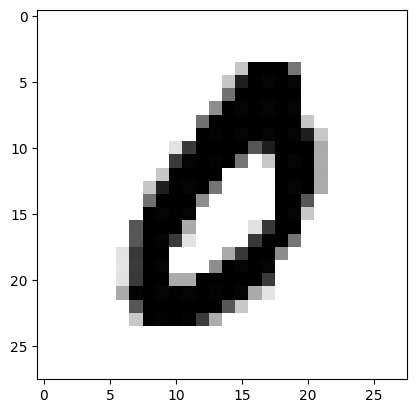

In [21]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

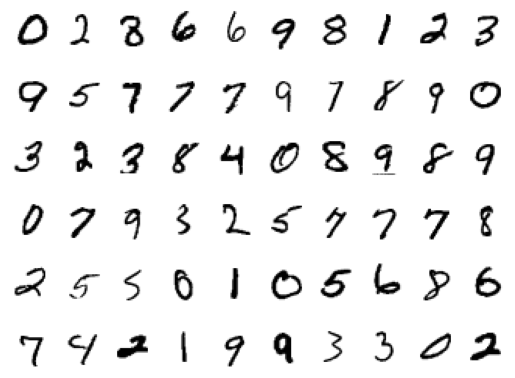

In [22]:
# @title
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [23]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ELU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ELU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ELU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=32, out_features=10, bias=True)
  (7): Softmax(dim=1)
)


In [24]:
criterion = nn.MSELoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

output = model(images)
labels_one_hot = torch.zeros_like(output)
labels_one_hot.scatter_(1, labels.view(-1, 1), 1.0)

loss = criterion(output, labels_one_hot)

In [25]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-2.9266e-05, -2.9266e-05, -2.9266e-05,  ..., -2.9266e-05,
         -2.9266e-05, -2.9266e-05],
        [ 2.1120e-05,  2.1120e-05,  2.1120e-05,  ...,  2.1120e-05,
          2.1120e-05,  2.1120e-05],
        [-5.8595e-06, -5.8595e-06, -5.8595e-06,  ..., -5.8595e-06,
         -5.8595e-06, -5.8595e-06],
        ...,
        [-5.6053e-06, -5.6053e-06, -5.6053e-06,  ..., -5.6053e-06,
         -5.6053e-06, -5.6053e-06],
        [-2.0764e-05, -2.0764e-05, -2.0764e-05,  ..., -2.0764e-05,
         -2.0764e-05, -2.0764e-05],
        [-3.5524e-05, -3.5524e-05, -3.5524e-05,  ..., -3.5524e-05,
         -3.5524e-05, -3.5524e-05]])


In [26]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [27]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
labels_one_hot = torch.zeros_like(output)
labels_one_hot.scatter_(1, labels.view(-1, 1), 1.0)

loss = criterion(output, labels_one_hot)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0211, -0.0141,  0.0119,  ...,  0.0339,  0.0202,  0.0229],
        [ 0.0193,  0.0114,  0.0220,  ...,  0.0356, -0.0305,  0.0011],
        [ 0.0216, -0.0003, -0.0301,  ...,  0.0190, -0.0138,  0.0269],
        ...,
        [ 0.0110,  0.0335, -0.0247,  ...,  0.0019,  0.0270,  0.0055],
        [-0.0028, -0.0257,  0.0040,  ..., -0.0184,  0.0237, -0.0190],
        [-0.0336, -0.0251,  0.0199,  ..., -0.0246, -0.0329,  0.0106]],
       requires_grad=True)
Gradient - tensor([[-5.1904e-05, -5.1904e-05, -5.1904e-05,  ..., -5.1904e-05,
         -5.1904e-05, -5.1904e-05],
        [-2.6562e-05, -2.6562e-05, -2.6562e-05,  ..., -2.6562e-05,
         -2.6562e-05, -2.6562e-05],
        [ 3.8918e-05,  3.8918e-05,  3.8918e-05,  ...,  3.8918e-05,
          3.8918e-05,  3.8918e-05],
        ...,
        [ 1.8881e-05,  1.8881e-05,  1.8881e-05,  ...,  1.8881e-05,
          1.8881e-05,  1.8881e-05],
        [-9.2155e-06, -9.2155e-06, -9.2155e-06,  ..., -9.2155e

In [28]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0111, -0.0041,  0.0219,  ...,  0.0439,  0.0302,  0.0329],
        [ 0.0293,  0.0214,  0.0320,  ...,  0.0456, -0.0205,  0.0111],
        [ 0.0116, -0.0103, -0.0401,  ...,  0.0090, -0.0238,  0.0169],
        ...,
        [ 0.0010,  0.0235, -0.0347,  ..., -0.0081,  0.0171, -0.0045],
        [ 0.0072, -0.0158,  0.0140,  ..., -0.0084,  0.0337, -0.0090],
        [-0.0237, -0.0152,  0.0298,  ..., -0.0146, -0.0230,  0.0205]],
       requires_grad=True)


Epoch 0 - Training loss: 0.01675352324856503
Epoch 1 - Training loss: 0.008806220330599534
Epoch 2 - Training loss: 0.0074366872554075215
Epoch 3 - Training loss: 0.00688920055102405
Epoch 4 - Training loss: 0.006356073278262219

Training Time (in minutes) = 1.690490758419037


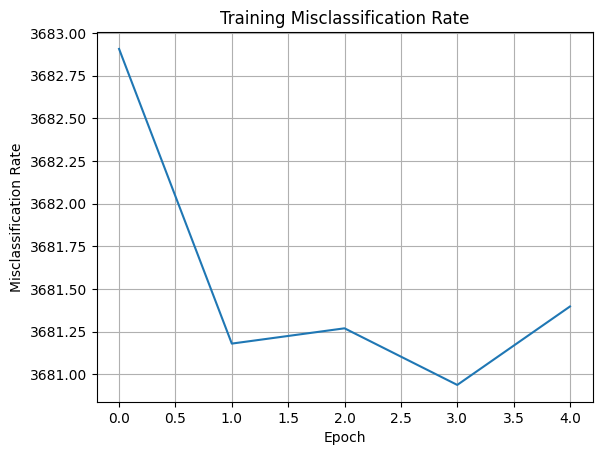

In [29]:
import csv
from datetime import datetime

optimizer = optim.Adam(model.parameters(), lr=0.003)
time0 = time()
epochs = 5
losses = []

for e in range(epochs):
    running_loss = 0
    misclassified_samples = 0

    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        predicted_labels = torch.argmax(output, dim=1)
        misclassified_samples += torch.sum(predicted_labels != labels.view(-1, 1)).item()

        # Training pass
        optimizer.zero_grad()
        output = model(images)
        labels_one_hot = torch.zeros_like(output)
        labels_one_hot.scatter_(1, labels.view(-1, 1), 1.0)
        loss = criterion(output, labels_one_hot)

        # This is where the model learns by backpropagating
        loss.backward()

        # And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()

    # Compute the misclassification rate
    misclassification_rate = misclassified_samples / len(trainloader)

    # Store the loss and misclassification rate in the list
    losses.append((e, misclassification_rate))

    # Print the training loss for the epoch
    print("Epoch {} - Training loss: {}".format(e, running_loss / len(trainloader)))

print("\nTraining Time (in minutes) =", (time() - time0) / 60)

# Save the loss data to a CSV file with time stamps
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"loss_{timestamp}.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Misclassification Rate'])
    writer.writerows(losses)

# Plot the loss data
epochs = [epoch for epoch, _ in losses]
misclassification_rates = [misclassification_rate for _, misclassification_rate in losses]

plt.plot(epochs, misclassification_rates)
plt.xlabel('Epoch')
plt.ylabel('Misclassification Rate')
plt.title('Training Misclassification Rate')
plt.grid(True)
plt.savefig(f"loss_{timestamp}.png")
plt.show()

In [30]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 3


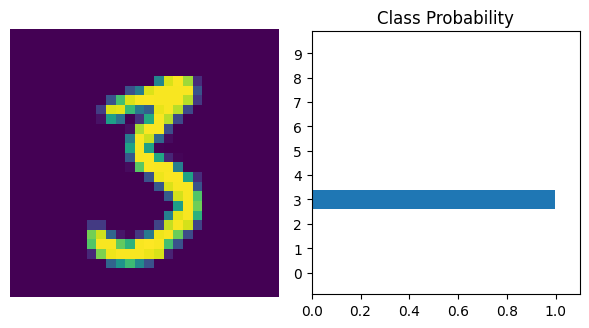

In [33]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    output = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.FloatTensor(output)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)



In [32]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.FloatTensor(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))



Number Of Images Tested = 10000

Model Accuracy = 0.9603


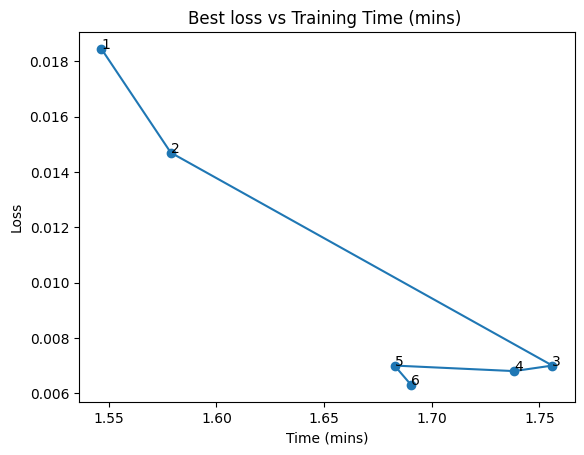

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your own)
attempts = 6 # Number of attempts
time_per_attempt = [1.5466,  1.5788, 1.7560, 1.7382 ,1.6827,1.6904]  # Time taken for each attempt
loss_per_attempt = [0.01845, 0.0147, 0.0070, 0.0068, 0.0070,0.0063]  # Loss value for each attempt

# Plotting the loss vs time
plt.plot(time_per_attempt, loss_per_attempt, marker='o')

# Customize the plot
plt.xlabel('Time (mins)')
plt.ylabel('Loss')
plt.title('Best loss vs Training Time (mins) ')

# Add labels for each point
for i in range(attempts):
    plt.text(time_per_attempt[i], loss_per_attempt[i], f'{i+1}')

# Show the plot
plt.show()
